In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

In [2]:
def F1(x):
    return np.sum(x**2)

def F2(x):
    A = 10
    return A * len(x) + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in x])

def F3(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def F4(x):
    return 1/4000 * np.sum(x**2) - np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1)))) + 1

def F5(x):
    return np.sum(np.abs(x * np.sin(x) + 0.1 * x))

def F6(x):
    sum = 0
    sum1 = 1
    for i in range(len(x)):
        sum += np.abs(x[i])
        sum1 *= np.abs(x[i])
    return sum + sum1

def F7(x):
    m = 10
    return -np.sum(np.sin(x) * np.sin(((np.arange(1, len(x) + 1) * x**2) / np.pi)**(2 * m)))

def F8(x):
    sum = 0
    for i in range(len(x)):
        sum += (x[i] + 0.5) * (x[i] + 0.5)
    return sum

def F9(x):
    n = len(x)
    return -20 * np.exp(-0.2 * np.sqrt(np.sum(x**2) / n)) - np.exp(np.sum(np.cos(2 * np.pi * x)) / n) + 20 + np.exp(1)

In [3]:
def flamingo_search(objective_function, initial_solution, n_iter, n_flamingos, sigma):
    best_solution = initial_solution
    best_objective_value = objective_function(best_solution)
    convergence = [best_objective_value]

    for i in range(n_iter):
        flamingos = [best_solution + np.random.normal(scale=sigma, size=len(best_solution)) for _ in range(n_flamingos)]
        for f in flamingos:
            f_value = objective_function(f)
            if f_value < best_objective_value:
                best_solution = f
                best_objective_value = f_value
        if i % 50 == 0:
            convergence.append(best_objective_value)

    convergence.append(best_objective_value)
    return best_solution, convergence

In [4]:
def create_population(size, dim, lb=-5, ub=10):
    return np.random.uniform(lb, ub, (size, dim))

def fitness_function(population, objective_function):
    fitness = np.array([objective_function(ind) for ind in population])
    fitness_prob = 1 / (fitness + 1e-10)
    fitness_prob -= np.min(fitness_prob)
    fitness_prob /= np.sum(fitness_prob)
    return fitness_prob

def selection(population, fitness, num_parents):
    parents_idx = np.random.choice(len(population), size=num_parents, replace=False, p=fitness)
    return population[parents_idx]

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        crossover_point = np.random.randint(1, offspring_size[1] - 1)
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, mutation_rate=0.1):
    for idx in range(offspring_crossover.shape[0]):
        if np.random.rand() < mutation_rate:
            random_index = np.random.randint(0, offspring_crossover.shape[1])
            offspring_crossover[idx, random_index] += np.random.normal()
    return offspring_crossover

In [5]:
def genetic_algorithm(population, objective_function, generations, mutation_rate=0.1, elitism_rate=0.1):
    convergence = []
    best_objective_value = np.inf

    for gen in range(generations):
        fitness = fitness_function(population, objective_function)
        parents = selection(population, fitness, len(population) // 2)
        offspring_crossover = crossover(parents, (len(population) - len(parents), population.shape[1]))
        offspring_mutation = mutation(offspring_crossover, mutation_rate)
        population[len(parents):] = offspring_mutation

        num_elites = int(elitism_rate * len(population))
        elites = population[np.argsort([objective_function(ind) for ind in population])[:num_elites]]
        population[:num_elites] = elites

        best_solution = population[np.argmin([objective_function(ind) for ind in population])]
        current_best_value = objective_function(best_solution)
        if current_best_value < best_objective_value:
            best_objective_value = current_best_value
        if gen % 50 == 0:
            convergence.append(best_objective_value)

    convergence.append(best_objective_value)
    return best_solution, convergence

In [6]:
def flamingo_genetic_search(objective_function, initial_solution, n_iter, n_flamingos, sigma, generations, population_size):
    fs_best_solutions = [flamingo_search(objective_function, initial_solution, n_iter, n_flamingos, sigma)[0] for _ in range(10)]
    population = create_population(population_size, len(initial_solution))
    population[:10] = fs_best_solutions
    best_solution, convergence = genetic_algorithm(population, objective_function, generations)
    return best_solution, convergence

In [7]:
def format_results(fs_convergence, ga_convergence, fsga_convergence):
    results = []
    for i in [100, 200, 300]:
        fs_fitness = fs_convergence[i // 50]
        ga_fitness = ga_convergence[i // 50]
        fsga_fitness = fsga_convergence[i // 50]
        results.append(f"Iteration {i}\tFSA: {fs_fitness:.4e}\tGA: {ga_fitness:.4e}\tFSA-GA: {fsga_fitness:.4e}")
    return results

## Dim = 10

Function: F1
Execution Time: 3.523430109024048 seconds
Flamingo Search Best Solution: [ 0.23078943  0.13029949 -0.05633368  0.10332243  0.20109421  0.17084089
  0.01864679 -0.06825647 -0.22582235 -0.11341016] Objective Value: 0.22258046086028271
Genetic Algorithm Best Solution: [ 0.0183109  -0.01755591 -0.00637705 -0.05381065 -0.02262893  0.01884696
 -0.01934518 -0.00179791  0.03980335 -0.00283409] Objective Value: 0.006416836034790282
Flamingo Search and Genetic Algorithm Mixed Best Solution: [ 0.00298542 -0.00322154  0.00027489 -0.00254698 -0.00677324 -0.00239687
  0.00636824  0.00148321  0.00694473  0.00804422] Objective Value: 0.00023316862129607472
Iteration		FSA		GA		FSA-GA
Iteration 100	FSA: 9.3531e+01	GA: 7.6086e-01	FSA-GA: 7.9525e-03
Iteration 200	FSA: 2.8179e-01	GA: 1.1690e-02	FSA-GA: 1.4321e-03
Iteration 300	FSA: 2.2258e-01	GA: 8.2401e-03	FSA-GA: 7.0784e-04
Function: F2
Execution Time: 8.443603515625 seconds
Flamingo Search Best Solution: [-0.11498617 -0.76474612  0.10732556

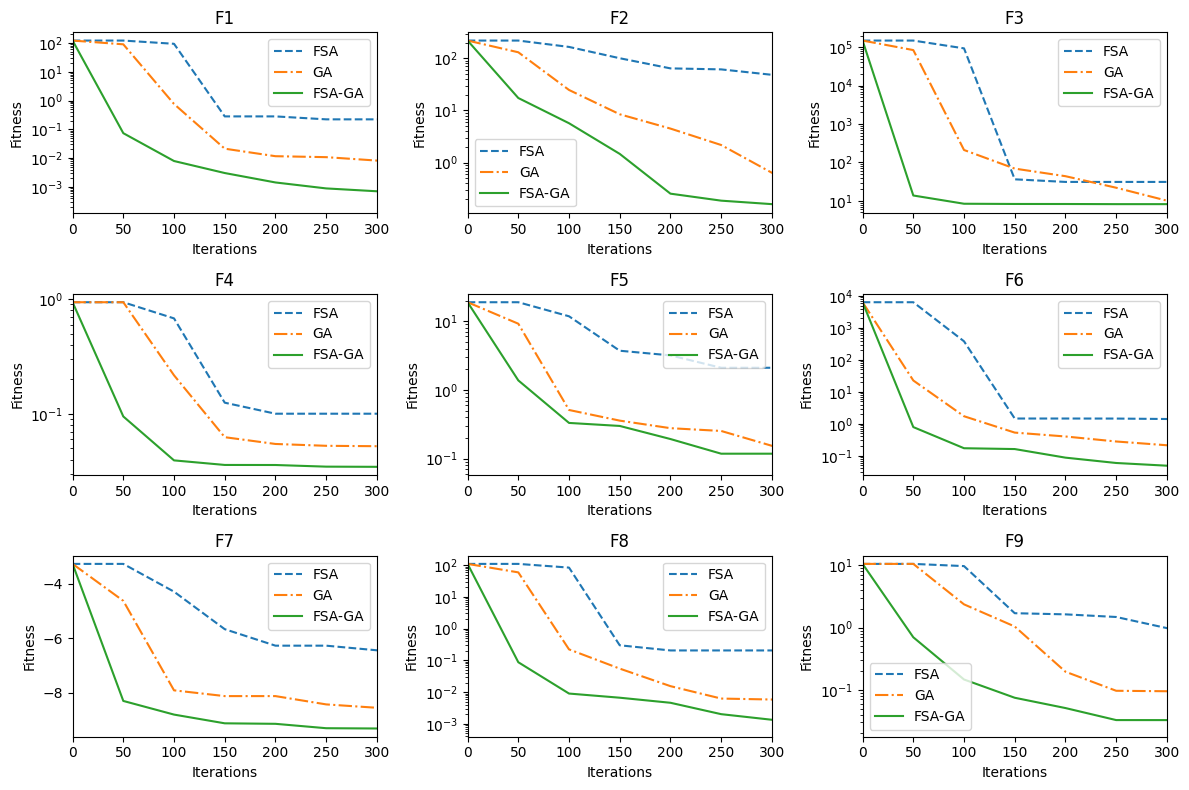

In [8]:
functions = [F1, F2, F3, F4, F5, F6, F7, F8, F9]
function_names = ["F1", "F2", "F3", "F4", "F5", "F6", "F7" , "F8", "F9"]

n_iter = 300  
n_flamingos = 100  
sigma = 0.5  
generations = 300  
population_size = 100  
dim = 10  
lb = -5
ub = 10

fig, axs = plt.subplots(3, 3, figsize=(12, 8))
axs = axs.ravel()

for i, (func, func_name) in enumerate(zip(functions, function_names)):
    initial_population = create_population(10, dim)
    initial_objective_values = np.array([func(ind) for ind in initial_population])
    best_initial_index = np.argmin(initial_objective_values)
    initial_solution = initial_population[best_initial_index]
    initial_value = initial_objective_values[best_initial_index]

    time_start = time.time()

    fs_best_solution, fs_convergence = flamingo_search(func, initial_solution, n_iter, n_flamingos, sigma)
    fs_convergence.insert(0, initial_value)

    population = create_population(population_size, dim)
    population[0] = initial_solution  
    ga_best_solution, ga_convergence = genetic_algorithm(population, func, generations)
    ga_convergence.insert(0, initial_value)

    fsga_best_solution, fsga_convergence = flamingo_genetic_search(func, initial_solution, n_iter, n_flamingos, sigma, generations, population_size)
    fsga_convergence.insert(0, initial_value)

    time_end = time.time()

    print(f"Function: {func_name}")
    print("Execution Time:", time_end - time_start, "seconds")
    print("Flamingo Search Best Solution:", fs_best_solution, "Objective Value:", func(fs_best_solution))
    print("Genetic Algorithm Best Solution:", ga_best_solution, "Objective Value:", func(ga_best_solution))
    print("Flamingo Search and Genetic Algorithm Mixed Best Solution:", fsga_best_solution, "Objective Value:", func(fsga_best_solution))

    formatted_results = format_results(fs_convergence, ga_convergence, fsga_convergence)
    print("Iteration\t\tFSA\t\tGA\t\tFSA-GA")
    for result in formatted_results:
        print(result)

    x_points = np.arange(0, len(fs_convergence) * 50, 50)  

    convergence_arrays = [fs_convergence, ga_convergence, fsga_convergence]
    min_length = min(map(len, convergence_arrays))
    convergence_arrays = [arr[:min_length] for arr in convergence_arrays]
    x_points = x_points[:min_length]

    axs[i].plot(x_points, convergence_arrays[0], label='FSA', linestyle='--')
    axs[i].plot(x_points, convergence_arrays[1], label='GA', linestyle='-.')
    axs[i].plot(x_points, convergence_arrays[2], label='FSA-GA')
    axs[i].set_title(func_name)
    axs[i].set_xlabel('Iterations')
    axs[i].set_ylabel('Fitness')    
    if func_name != "F7":
        axs[i].set_yscale('log')  
    axs[i].legend()
    axs[i].set_xlim(0, 300)

plt.tight_layout()
plt.show()

## Dim = 30

Function: F1
Execution Time: 3.092510938644409 seconds
Flamingo Search Best Solution: [-0.47741735  0.48772076  0.02476971  0.24381131 -0.07913779  0.49599331
 -0.49324455  0.07339583  0.1626714  -0.20323554 -0.25522224  0.50855808
 -0.0525654  -0.51264392  0.2967608  -0.04096923  0.62163798 -0.09121775
 -0.35957434  0.19395213 -0.00680592 -0.01247968 -0.37388188  0.37286398
 -0.03273379  0.37239307  0.39616704  0.08205603  0.09767665  0.03667726] Objective Value: 2.9286528250954507
Genetic Algorithm Best Solution: [-0.04067094  0.11912751  0.03376675 -0.02016448  0.19983215 -0.01237378
  0.14773426  0.13724844 -0.07223835  0.00696869  0.20711527 -0.15476435
  0.23946823  0.27946494 -0.04488537 -0.16252377 -0.13092537  0.03860987
  0.10567161  0.04156621 -0.02036873  0.19799599  0.02881157  0.13343494
 -0.21901448 -0.0412944  -0.21902825 -0.0026612  -0.11306083  0.28411149] Objective Value: 0.6150646831549946
Flamingo Search and Genetic Algorithm Mixed Best Solution: [-0.01525621 -0.04

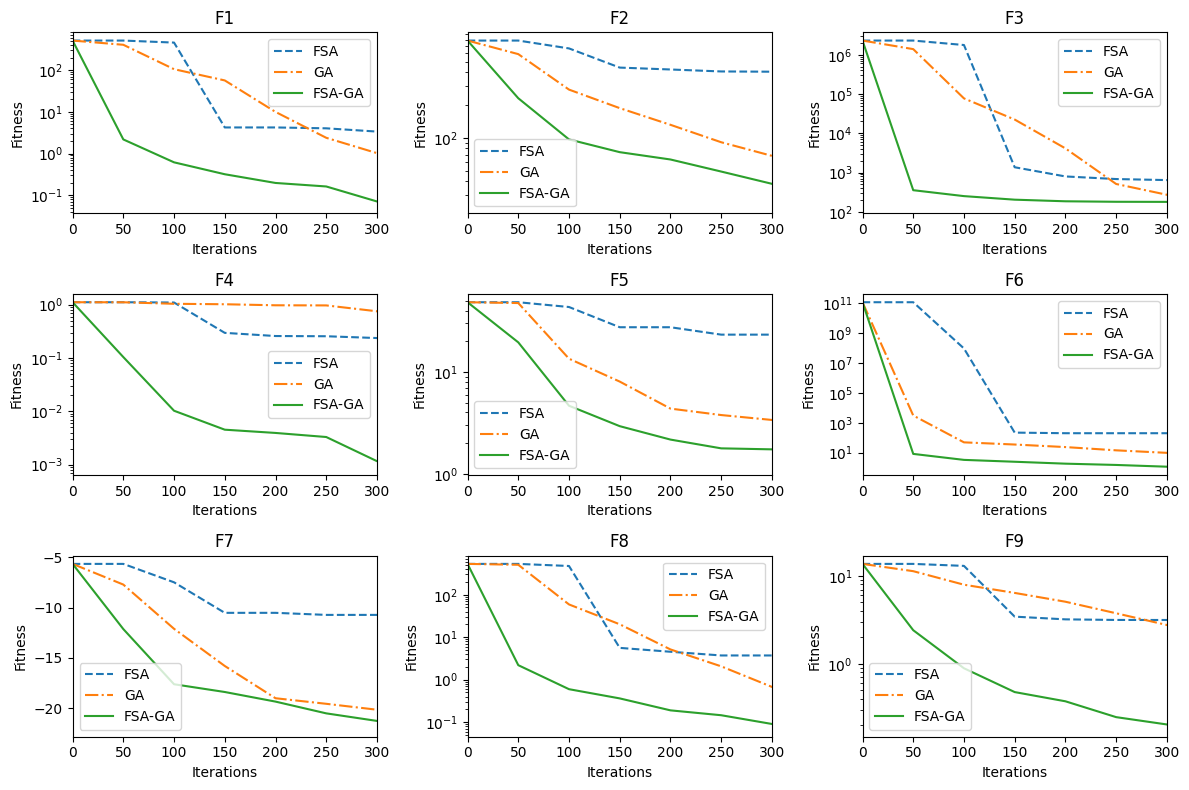

In [9]:
functions = [F1, F2, F3, F4, F5, F6, F7, F8, F9]
function_names = ["F1", "F2", "F3", "F4", "F5", "F6", "F7" , "F8", "F9"]

n_iter = 300  
n_flamingos = 100  
sigma = 0.5  
generations = 300  
population_size = 100  
dim = 30 
lb = -5
ub = 10

fig, axs = plt.subplots(3, 3, figsize=(12, 8))
axs = axs.ravel()

for i, (func, func_name) in enumerate(zip(functions, function_names)):
    initial_population = create_population(10, dim)
    initial_objective_values = np.array([func(ind) for ind in initial_population])
    best_initial_index = np.argmin(initial_objective_values)
    initial_solution = initial_population[best_initial_index]
    initial_value = initial_objective_values[best_initial_index]

    time_start = time.time()

    fs_best_solution, fs_convergence = flamingo_search(func, initial_solution, n_iter, n_flamingos, sigma)
    fs_convergence.insert(0, initial_value)

    population = create_population(population_size, dim)
    population[0] = initial_solution  
    ga_best_solution, ga_convergence = genetic_algorithm(population, func, generations)
    ga_convergence.insert(0, initial_value)

    fsga_best_solution, fsga_convergence = flamingo_genetic_search(func, initial_solution, n_iter, n_flamingos, sigma, generations, population_size)
    fsga_convergence.insert(0, initial_value)

    time_end = time.time()

    print(f"Function: {func_name}")
    print("Execution Time:", time_end - time_start, "seconds")
    print("Flamingo Search Best Solution:", fs_best_solution, "Objective Value:", func(fs_best_solution))
    print("Genetic Algorithm Best Solution:", ga_best_solution, "Objective Value:", func(ga_best_solution))
    print("Flamingo Search and Genetic Algorithm Mixed Best Solution:", fsga_best_solution, "Objective Value:", func(fsga_best_solution))

    formatted_results = format_results(fs_convergence, ga_convergence, fsga_convergence)
    print("Iteration\t\tFSA\t\tGA\t\tFSA-GA")
    for result in formatted_results:
        print(result)

    x_points = np.arange(0, len(fs_convergence) * 50, 50)  

    convergence_arrays = [fs_convergence, ga_convergence, fsga_convergence]
    min_length = min(map(len, convergence_arrays))
    convergence_arrays = [arr[:min_length] for arr in convergence_arrays]
    x_points = x_points[:min_length]

    axs[i].plot(x_points, convergence_arrays[0], label='FSA', linestyle='--')
    axs[i].plot(x_points, convergence_arrays[1], label='GA', linestyle='-.')
    axs[i].plot(x_points, convergence_arrays[2], label='FSA-GA')
    axs[i].set_title(func_name)
    axs[i].set_xlabel('Iterations')
    axs[i].set_ylabel('Fitness')    
    if func_name != "F7":
        axs[i].set_yscale('log')  
    axs[i].legend()
    axs[i].set_xlim(0, 300)

plt.tight_layout()
plt.show()

## Dim = 50

Function: F1
Execution Time: 3.1305789947509766 seconds
Flamingo Search Best Solution: [-0.58296216  0.1729515   0.32288649 -0.26219045 -0.08085764 -0.56791204
  0.32753319 -0.01258769 -0.93563139 -0.24354428  0.33489689 -0.46011743
  0.57008095  0.37164118  0.97344569  0.09118024 -0.07625357 -0.18876677
 -0.07960281  0.10309508 -0.48018513 -0.06586893 -0.25467638  0.57138999
 -0.08602044  0.27608281  0.50010579 -0.01792781 -0.68079474  0.00184022
 -0.55419879 -1.0779143   0.15187407  0.08845063  0.49122084 -0.57903062
 -0.47428399  1.08379668  0.04473893 -0.04049427 -0.25525639  0.59680509
 -0.43124796  0.29030016 -0.1681656   0.69753065  0.34299908 -0.71800664
  0.10602136 -0.38309056] Objective Value: 10.616359523580652
Genetic Algorithm Best Solution: [-0.69642046  0.13151343  0.05046776 -0.01242214  0.15753663  0.28560988
  0.43418452 -1.44956663 -0.16801638  0.10068125  0.15026998  0.57599743
 -0.80921634 -0.29683492 -0.25972278 -0.64788704  0.92581981  0.03626902
  0.46195135  0

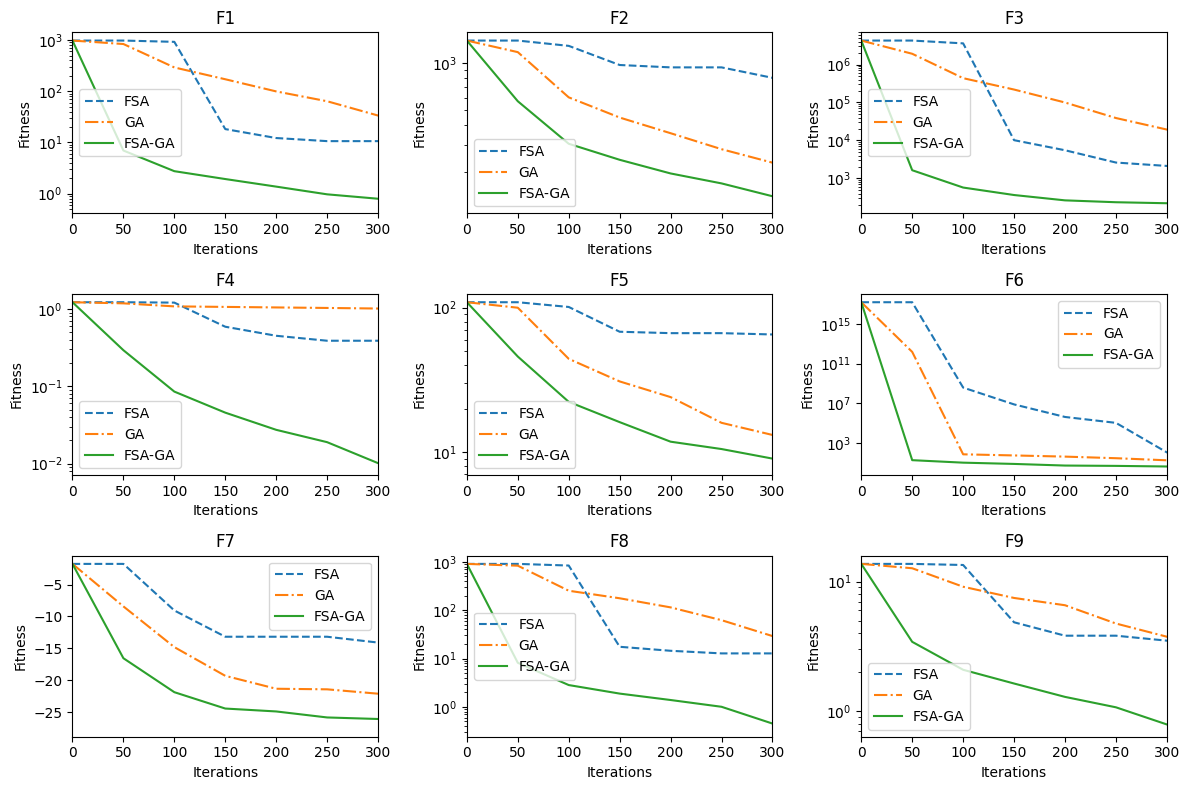

In [10]:
functions = [F1, F2, F3, F4, F5, F6, F7, F8, F9]
function_names = ["F1", "F2", "F3", "F4", "F5", "F6", "F7" , "F8", "F9"]

n_iter = 300  
n_flamingos = 100  
sigma = 0.5  
generations = 300  
population_size = 100  
dim = 50
lb = -5
ub = 10

fig, axs = plt.subplots(3, 3, figsize=(12, 8))
axs = axs.ravel()

for i, (func, func_name) in enumerate(zip(functions, function_names)):
    initial_population = create_population(10, dim)
    initial_objective_values = np.array([func(ind) for ind in initial_population])
    best_initial_index = np.argmin(initial_objective_values)
    initial_solution = initial_population[best_initial_index]
    initial_value = initial_objective_values[best_initial_index]

    time_start = time.time()

    fs_best_solution, fs_convergence = flamingo_search(func, initial_solution, n_iter, n_flamingos, sigma)
    fs_convergence.insert(0, initial_value)

    population = create_population(population_size, dim)
    population[0] = initial_solution  
    ga_best_solution, ga_convergence = genetic_algorithm(population, func, generations)
    ga_convergence.insert(0, initial_value)

    fsga_best_solution, fsga_convergence = flamingo_genetic_search(func, initial_solution, n_iter, n_flamingos, sigma, generations, population_size)
    fsga_convergence.insert(0, initial_value)

    time_end = time.time()

    print(f"Function: {func_name}")
    print("Execution Time:", time_end - time_start, "seconds")
    print("Flamingo Search Best Solution:", fs_best_solution, "Objective Value:", func(fs_best_solution))
    print("Genetic Algorithm Best Solution:", ga_best_solution, "Objective Value:", func(ga_best_solution))
    print("Flamingo Search and Genetic Algorithm Mixed Best Solution:", fsga_best_solution, "Objective Value:", func(fsga_best_solution))

    formatted_results = format_results(fs_convergence, ga_convergence, fsga_convergence)
    print("Iteration\t\tFSA\t\tGA\t\tFSA-GA")
    for result in formatted_results:
        print(result)

    x_points = np.arange(0, len(fs_convergence) * 50, 50)  

    convergence_arrays = [fs_convergence, ga_convergence, fsga_convergence]
    min_length = min(map(len, convergence_arrays))
    convergence_arrays = [arr[:min_length] for arr in convergence_arrays]
    x_points = x_points[:min_length]

    axs[i].plot(x_points, convergence_arrays[0], label='FSA', linestyle='--')
    axs[i].plot(x_points, convergence_arrays[1], label='GA', linestyle='-.')
    axs[i].plot(x_points, convergence_arrays[2], label='FSA-GA')
    axs[i].set_title(func_name)
    axs[i].set_xlabel('Iterations')
    axs[i].set_ylabel('Fitness')    
    if func_name != "F7":
        axs[i].set_yscale('log')  
    axs[i].legend()
    axs[i].set_xlim(0, 300)

plt.tight_layout()
plt.show()